In [15]:
# PCA를 통해 데이터 축소 후 k-means 클러스터링
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

credit_df1 = pd.read_csv('data/CC_GENERAL.csv')

# 고객 아이디 제외한 고객 정보 데이터 분리
credit_df2 = credit_df1.drop('CUST_ID', axis = 1)
scaled_credit_df2 = (credit_df2 - credit_df2.mean()) / credit_df2.std()  # 컬럼별 표준화 진행

# PCA로 차원축소(2차원)
X = scaled_credit_df2.copy()

# 객체
pca = PCA(n_components=2)

# 적용
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)

<Axes: >

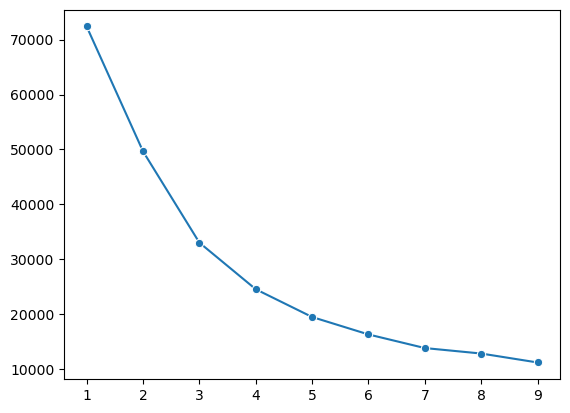

In [16]:
# k-means 클러스터링
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)
    
#시각화
sns.lineplot(x=ks, y=inertias, marker='o')

<Axes: xlabel='PC1', ylabel='PC2'>

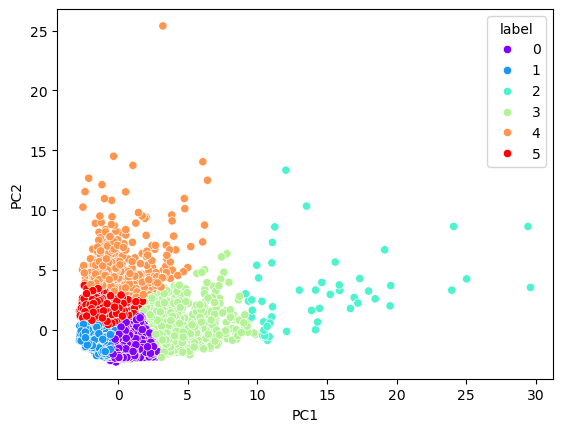

In [17]:
model = KMeans(n_clusters=6)
model.fit(pca_df)
labels = model.labels_  # 고객마다 부여할 클러스터
x, y = pca_df[0], pca_df[1]

# PCA 진행한 데이터프레임에 클러스터 번호 부여
pca_km_df = pd.DataFrame({'PC1': x, 'PC2':y, 'label':labels})

# 시각화
sns.scatterplot(data=pca_km_df, x='PC1', y='PC2', hue='label', palette='rainbow')


In [18]:
# k = 6인 k-means 클러스터링 진행
model = KMeans(n_clusters=6, random_state = 111)
model.fit(pca_df)

labels=model.labels_  #고객마다 부여할 클러스터

# 원본 데이터에 클러스터 부여
credit_df1['cluster'] = labels

# 각 클러스터별 할당된 고객의 수
credit_df1['CUST_ID'].groupby(credit_df1['cluster']).count()

cluster
0    2963
1    1647
2     776
3     444
4    3080
5      40
Name: CUST_ID, dtype: int64

In [19]:
credit_df1.groupby('cluster')[['BALANCE', 'BALANCE_FREQUENCY']].mean().T

cluster,0,1,2,3,4,5
BALANCE,717.184606,2825.811378,2669.286300,6175.352351,706.732192,5824.065352
BALANCE_FREQUENCY,0.917466,0.946029,0.986386,0.977628,0.758698,0.967955


- 클러스터 0: 평균 잔액이 낮은 편이며 잔액 갱신 빈도가 중간인 고객군
- 클러스터 1: 평균 잔액이 중간인 편이며 잔액 갱신 빈도가 중간인 고객군
- 클러스터 2: 평균 잔액이 중간인 편이며 잔액 갱신 빈도가 가장 높은 고객군
- 클러스터 3: 평균 잔액이 가장 높은 편이며 잔액 갱신 빈도가 꽤 높은 정도인 고객군
- 클러스터 4: 평균 잔액이 가장 낮으며 잔액 갱신 빈도도 가장 낮은 고객군
- 클러스터 5: 평균 잔액이 높은 편이며 잔액 갱신 빈도 또한 높은 편인 고객군